In [2]:
#Import data from mongoDB
import pandas as pd
import pymongo
client = pymongo.MongoClient("localhost", 27017)
db = client["BIGDATA-PROJECT"]
collection = db["TVSERIES"] 
cursor = collection.find()
data=pd.DataFrame(list(cursor))
client.close()
data=data
print(data)

                            _id                         name  \
0      657aadec61afffb42be10e61              Game of Thrones   
1      657aadec61afffb42be10e62                  Money Heist   
2      657aadec61afffb42be10e63              Stranger Things   
3      657aadec61afffb42be10e64             The Walking Dead   
4      657aadec61afffb42be10e65                      Lucifer   
...                         ...                          ...   
19996  657aaded61afffb42be15c7d  Dick and Dom in da Bungalow   
19997  657aaded61afffb42be15c7e        El corazón del océano   
19998  657aaded61afffb42be15c7f              Tears in Heaven   
19999  657aaded61afffb42be15c80                          E/R   
20000  657aaded61afffb42be15c81                  Little Nick   

       number_of_episodes original_language  vote_count  vote_average  \
0                      73                en       21857         8.442   
1                      41                es       17836         8.257   
2           

In [9]:
pip install --upgrade scikit-learn imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import *




# Data Cleaning
data.dropna(inplace=True)  # Drop rows with missing values
encoder = LabelEncoder()
data['original_language'] = encoder.fit_transform(data['original_language'])  # Encoding categorical variables

# Combine selected features into a single column
selected_columns = ['name', 'number_of_episodes', 'original_language', 'vote_count']
data['combined_features'] = data[selected_columns].astype(str).apply(lambda x: ' '.join(x), axis=1)

# Create TF-IDF matrix
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(data['combined_features'])

# Define the target column
target = 'vote_Avg_Category'  # Assuming 'vote_Avg_Category' is the column for vote average categories

# Class Balancing with SMOTE
X = tfidf_matrix
y = data[target]
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize and train a Support Vector Machine Classifier model
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions using Support Vector Machine Classifier
svm_predictions = svm_model.predict(X_test)

# Generate a classification report for Support Vector Machine Classifier
svm_report = classification_report(y_test, svm_predictions)
print("Support Vector Machine Classifier Report:\n", svm_report)

# Example: Get TV series recommendations using SVM model
def get_recommendations_svm(tv_series_title, cosine_sim=linear_kernel(tfidf_matrix, tfidf_matrix), data=data):
    idx = data[data['name'].str.lower() == tv_series_title.lower()].index
    if len(idx):
        idx = idx[0]
        sim_scores = list(enumerate(cosine_sim[idx]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        sim_scores = sim_scores[1:11]  # Top 10 similar TV series
        tv_indices = [i[0] for i in sim_scores]
        return data['name'].iloc[tv_indices]
    else:
        return "TV series not found in the database."

suggestions_svm = get_recommendations_svm('Loki')  # Change the title to a TV series title
print("\nRecommendations for 'Loki' using SVM:\n", suggestions_svm)


Support Vector Machine Classifier Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      2660
           1       0.76      0.84      0.80      2663
           2       0.76      0.59      0.67      2644
           3       0.77      0.85      0.80      2693

    accuracy                           0.82     10660
   macro avg       0.82      0.82      0.82     10660
weighted avg       0.82      0.82      0.82     10660


Recommendations for 'Loki' using SVM:
 11823    Thor & Loki: Blood Brothers
10478                            HIM
10277                  The Other One
10295                          MOST!
19393             He Is Always There
6247                            Back
10616                      The Curse
10540                           Rapa
10699                        Apaches
14949                     Not Others
Name: name, dtype: object


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder



# Data Cleaning
data.dropna(inplace=True)  # Drop rows with missing values

# Encoding categorical variables (if 'original_language' is categorical)
encoder = LabelEncoder()
data['original_language'] = encoder.fit_transform(data['original_language'])

# Combine selected features into a single column
selected_columns = ['name', 'number_of_episodes', 'original_language', 'vote_count']
data['combined_features'] = data[selected_columns].astype(str).apply(lambda x: ' '.join(x), axis=1)

# Create TF-IDF matrix
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(data['combined_features'])

# Define the target column
target = 'vote_Avg_Category'  # Assuming 'vote_Avg_Category' is the column for vote average categories

# Class Balancing with SMOTE
X = tfidf_matrix
y = data[target]
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize and train a Random Forest Classifier model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust n_estimators as needed
rf_model.fit(X_train, y_train)

# Make predictions using Random Forest Classifier
rf_predictions = rf_model.predict(X_test)

# Generate a classification report for Random Forest Classifier
rf_report = classification_report(y_test, rf_predictions)
print("Random Forest Classifier Report:\n", rf_report)

# Example: Get TV series recommendations using Random Forest model
def get_recommendations_rf(tv_series_title, cosine_sim=linear_kernel(tfidf_matrix, tfidf_matrix), data=data):
    idx = data[data['name'].str.lower() == tv_series_title.lower()].index
    if len(idx):
        idx = idx[0]
        sim_scores = list(enumerate(cosine_sim[idx]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        sim_scores = sim_scores[1:11]  # Top 10 similar TV series
        tv_indices = [i[0] for i in sim_scores]
        return data['name'].iloc[tv_indices]
    else:
        return "TV series not found in the database."

suggestions_rf = get_recommendations_rf('Loki')  # Change the title to a TV series title
print("\nRecommendations for 'Loki' using Random Forest:\n", suggestions_rf)


Random Forest Classifier Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2660
           1       0.92      0.84      0.88      2663
           2       0.75      0.90      0.82      2644
           3       0.92      0.82      0.87      2693

    accuracy                           0.89     10660
   macro avg       0.90      0.89      0.89     10660
weighted avg       0.90      0.89      0.89     10660


Recommendations for 'Loki' using Random Forest:
 11823    Thor & Loki: Blood Brothers
10478                            HIM
10277                  The Other One
10295                          MOST!
19393             He Is Always There
6247                            Back
10616                      The Curse
10540                           Rapa
10699                        Apaches
14949                     Not Others
Name: name, dtype: object


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

# Assuming 'data' is your DataFrame with the required columns

# Data Cleaning
data.dropna(inplace=True)  # Drop rows with missing values

# Encoding categorical variables (if 'original_language' is categorical)
encoder = LabelEncoder()
data['original_language'] = encoder.fit_transform(data['original_language'])

# Combine selected features into a single column
selected_columns = ['name', 'number_of_episodes', 'original_language', 'vote_count']
data['combined_features'] = data[selected_columns].astype(str).apply(lambda x: ' '.join(x), axis=1)

# Create TF-IDF matrix
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(data['combined_features'])

# Define the target column
target = 'vote_Avg_Category'  # Assuming 'vote_Avg_Category' is the column for vote average categories

# Class Balancing with SMOTE
X = tfidf_matrix
y = data[target]
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize and train a Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000, random_state=42)  # You can adjust parameters as needed
logreg_model.fit(X_train, y_train)

# Make predictions using Logistic Regression
logreg_predictions = logreg_model.predict(X_test)

# Generate a classification report for Logistic Regression
logreg_report = classification_report(y_test, logreg_predictions)
print("Logistic Regression Classifier Report:\n", logreg_report)

# Example: Get TV series recommendations using Logistic Regression model
def get_recommendations_logreg(tv_series_title, cosine_sim=linear_kernel(tfidf_matrix, tfidf_matrix), data=data):
    idx = data[data['name'].str.lower() == tv_series_title.lower()].index
    if len(idx):
        idx = idx[0]
        sim_scores = list(enumerate(cosine_sim[idx]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        sim_scores = sim_scores[1:11]  # Top 10 similar TV series
        tv_indices = [i[0] for i in sim_scores]
        return data['name'].iloc[tv_indices]
    else:
        return "TV series not found in the database."

suggestions_logreg = get_recommendations_logreg('Loki')  # Change the title to a TV series title
print("\nRecommendations for 'Loki' using Logistic Regression:\n", suggestions_logreg)


Logistic Regression Classifier Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      2660
           1       0.76      0.80      0.78      2663
           2       0.71      0.60      0.65      2644
           3       0.74      0.81      0.77      2693

    accuracy                           0.80     10660
   macro avg       0.80      0.80      0.80     10660
weighted avg       0.80      0.80      0.80     10660


Recommendations for 'Loki' using Logistic Regression:
 11823    Thor & Loki: Blood Brothers
10478                            HIM
10277                  The Other One
10295                          MOST!
19393             He Is Always There
6247                            Back
10616                      The Curse
10540                           Rapa
10699                        Apaches
14949                     Not Others
Name: name, dtype: object


In [2]:
pip install -U imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder


# Data Cleaning
data.dropna(inplace=True)  # Drop rows with missing values
encoder = LabelEncoder()
data['original_language'] = encoder.fit_transform(data['original_language'])  # Encoding categorical variables

# Combine selected features into a single column
selected_columns = ['name', 'number_of_episodes', 'original_language', 'vote_count']
data['combined_features'] = data[selected_columns].astype(str).apply(lambda x: ' '.join(x), axis=1)

# Create TF-IDF matrix
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(data['combined_features'])

# Define the target column
target = 'vote_Avg_Category'  # Assuming 'vote_Avg_Category' is the column for vote average categories

# Class Balancing with SMOTE
X = tfidf_matrix
y = data[target]
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize and train a Gradient Boosting Classifier model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions using Gradient Boosting Classifier
gb_predictions = gb_model.predict(X_test)

# Generate a classification report for Gradient Boosting Classifier
gb_report = classification_report(y_test, gb_predictions)
print("Gradient Boosting Classifier Report:\n", gb_report)

# Example: Get TV series recommendations using Gradient Boosting model
def get_recommendations_gb(tv_series_title, cosine_sim=linear_kernel(tfidf_matrix, tfidf_matrix), data=data):
    idx = data[data['name'].str.lower() == tv_series_title.lower()].index
    if len(idx):
        idx = idx[0]
        sim_scores = list(enumerate(cosine_sim[idx]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        sim_scores = sim_scores[1:11]  # Top 10 similar TV series
        tv_indices = [i[0] for i in sim_scores]
        return data['name'].iloc[tv_indices]
    else:
        return "TV series not found in the database."

suggestions_gb = get_recommendations_gb('Loki')  # Change the title to a TV series title
print("\nRecommendations for 'Loki' using Gradient Boosting:\n", suggestions_gb)


NameError: name 'data' is not defined

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

# Assuming 'data' is your DataFrame with the required columns

# Data Cleaning
data.dropna(inplace=True)  # Drop rows with missing values

# Encoding categorical variables (if 'original_language' is categorical)
encoder = LabelEncoder()
data['original_language'] = encoder.fit_transform(data['original_language'])

# Combine selected features into a single column
selected_columns = ['name', 'number_of_episodes', 'original_language', 'vote_count']
data['combined_features'] = data[selected_columns].astype(str).apply(lambda x: ' '.join(x), axis=1)

# Create TF-IDF matrix
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(data['combined_features'])

# Define the target column
target = 'vote_Avg_Category'  # Assuming 'vote_Avg_Category' is the column for vote average categories

# Class Balancing with SMOTE
X = tfidf_matrix
y = data[target]
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize and train a Decision Tree Classifier model
dt_model = DecisionTreeClassifier(random_state=42)  # You can add parameters as needed
dt_model.fit(X_train, y_train)

# Make predictions using Decision Tree Classifier
dt_predictions = dt_model.predict(X_test)

# Generate a classification report for Decision Tree Classifier
dt_report = classification_report(y_test, dt_predictions)
print("Decision Tree Classifier Report:\n", dt_report)

# Example: Get TV series recommendations using Decision Tree model
def get_recommendations_dt(tv_series_title, cosine_sim=linear_kernel(tfidf_matrix, tfidf_matrix), data=data):
    idx = data[data['name'].str.lower() == tv_series_title.lower()].index
    if len(idx):
        idx = idx[0]
        sim_scores = list(enumerate(cosine_sim[idx]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        sim_scores = sim_scores[1:11]  # Top 10 similar TV series
        tv_indices = [i[0] for i in sim_scores]
        return data['name'].iloc[tv_indices]
    else:
        return "TV series not found in the database."

suggestions_dt = get_recommendations_dt('Loki')  # Change the title to a TV series title
print("\nRecommendations for 'Loki' using Decision Tree Classifier:\n", suggestions_dt)


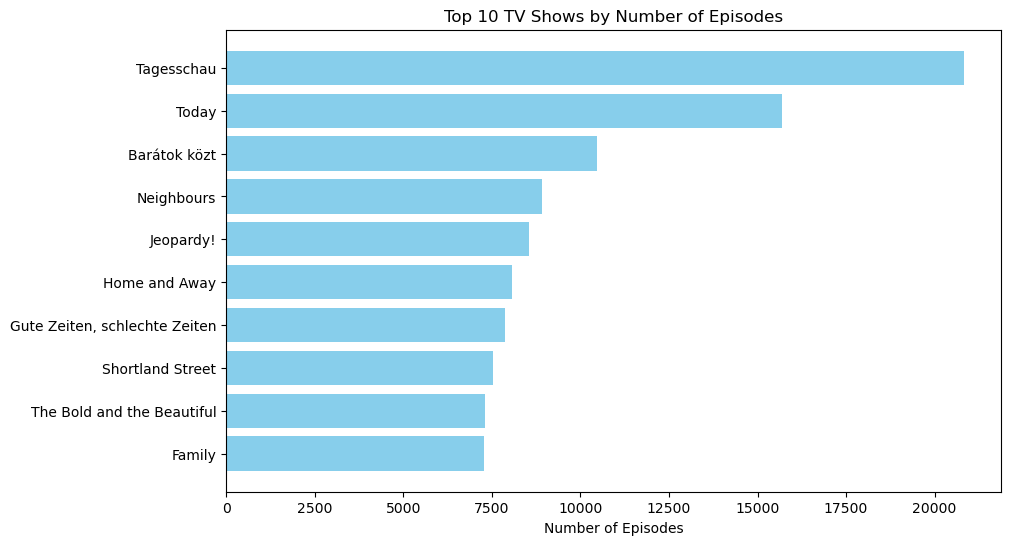

In [3]:
import matplotlib.pyplot as plt

# Select the top 10 TV shows by number of episodes
top_10_episodes = data.nlargest(10, 'number_of_episodes')

plt.figure(figsize=(10, 6))
plt.barh(top_10_episodes['name'], top_10_episodes['number_of_episodes'], color='skyblue')
plt.xlabel('Number of Episodes')
plt.title('Top 10 TV Shows by Number of Episodes')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest number of episodes at the top
plt.show()
